In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd, numpy as np

In [2]:
from sklearn.metrics import mean_absolute_error

# Load the training and test data

In [3]:
df_train_orig = pd.read_csv("../data/train_v2.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (135,204,274,417) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [151]:
df_test = pd.read_csv("../data/test_v2.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (417) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
np.shape(df_train_orig)

(105471, 771)

In [152]:
np.shape(df_test)

(210944, 770)

Peek at both dataframes

In [7]:
df_train_orig.sample(10)

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
49625,49626,145,7,0.412953,5300,7,79754,467.0,4004.0,152.69,...,5,2.45,-2.06,1.79,0.2880,0.6471,0,1,4,0
73599,73600,153,8,0.213561,4100,3,14002,5211.0,4448.0,152.40,...,7,3.10,-2.27,1.69,0.2058,1.0304,1,1,20,0
13197,13198,129,9,0.339997,1300,17,79884,7723.0,2697.0,128.00,...,2,0.45,-0.24,0.13,0.0937,-2.0622,1,0,394,0
82226,82227,154,9,0.057141,3900,7,6075,3646.0,177.0,154.00,...,2,1.04,-0.75,0.55,0.0400,2.9860,1,1,9,0
84814,84815,121,9,0.149691,2700,4,80421,4063.0,1127.0,123.37,...,35,12.43,-8.62,6.14,0.2210,0.7394,0,0,49,0
28078,28079,129,9,0.540135,1800,16,79391,398.0,1552.0,129.41,...,33,11.31,-8.16,6.22,0.2741,0.7219,0,0,1079,0
44998,44999,148,9,0.034415,4700,4,78238,607.0,317.0,146.22,...,38,10.63,-7.63,5.89,0.2727,-0.6887,0,1,3,0
52518,52519,120,10,0.938908,1800,17,8563,1175.0,1894.0,120.74,...,7,1.23,-0.97,0.84,0.3145,-1.0406,1,0,394,0
65533,65534,158,8,0.482686,5300,4,76136,28.0,303.0,157.75,...,18,6.43,-4.68,3.63,0.2653,0.7103,0,1,12,0
62703,62704,162,8,0.108093,3600,10,14002,5091.0,4256.0,157.00,...,2,1.37,-1.15,0.99,0.1123,1.7324,1,1,31,0


In [8]:
df_test.sample(10)

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778
113807,219279,131,8,0.115148,2200,16.0,1078,1899.0,4694.0,129.90,...,-6.89,13,5.15,-3.99,3.18,0.3395,0.8636,0,0,1079
117526,222998,120,10,0.257952,1500,10.0,2497,178.0,1599.0,118.06,...,-7.45,15,4.60,-3.01,2.03,0.2449,0.9140,1,0,10
210579,316051,126,9,0.054116,5300,7.0,8563,2924.0,959.0,124.51,...,-9.31,39,12.57,-2.31,0.32,0.3009,1.9318,0,0,393
174772,280244,123,8,0.109674,4600,4.0,80684,111.0,2685.0,154.65,...,-6.99,16,9.14,-13.67,0.08,0.2414,-0.5100,1,1,11
156752,262224,119,11,0.307381,3100,15.0,76635,3.0,175.0,120.07,...,-21.85,12,21.90,-0.72,0.18,0.2955,-1.4365,1,0,37
137824,243296,126,9,0.351225,1500,4.0,86892,58.0,698.0,120.06,...,-6.00,14,3.54,-2.33,1.63,0.2630,0.4073,1,0,10
191806,297278,132,8,0.192284,4400,2.0,84598,1617.0,684.0,114.44,...,-8.83,21,21.67,-1.61,0.11,0.2827,0.5682,0,1,73
21918,127390,128,9,0.329164,1100,4.0,78802,534.0,1531.0,114.63,...,-8.30,6,8.00,-10.84,0.03,0.2990,1.2585,0,1,54
112855,218327,155,8,0.371594,2200,10.0,10529,8990.0,2281.0,153.13,...,-1.25,11,2.84,-2.01,3.17,0.0921,-19.5622,1,0,49
200570,306042,126,1,0.278611,3100,10.0,83241,5688.0,2405.0,133.69,...,-5.85,6,16.96,-3.35,0.41,0.2293,-0.5134,0,1,1079


''

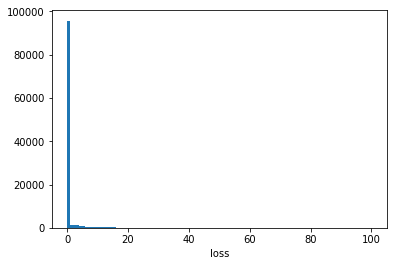

In [9]:
plt.hist(df_train_orig.loss, range=(0,100), bins=100)
plt.xlabel("loss")
;

What proportion of transactions have loss?

In [75]:
len(df_train_orig[df_train_orig.loss != 0]) / len(df_train_orig)

0.09275535455243622

The vast majority of transactions have no loss

Text(0.5,0,'loss')

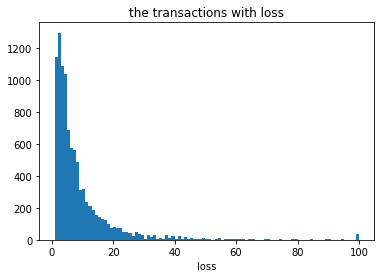

In [10]:
plt.hist(df_train_orig.loss, range=(1,100), bins=99);
plt.title("the transactions with loss")
plt.xlabel("loss")

## Sanity check re target MAE values

Get an idea for what the MAE would be for some useless baseline predictions, such as always predicting 0.

Clearly I am using the entire training set here as it's just exploration

In [11]:
baseline_prediction = np.zeros((len(df_train_orig), ))

In [12]:
mean_absolute_error(df_train_orig.loss, baseline_prediction)

0.7995847199704184

In [13]:
baseline_prediction = np.ones((len(df_train_orig), )) * df_train_orig.loss.mean()

In [14]:
mean_absolute_error(df_train_orig.loss, baseline_prediction)

1.4508379115497037

In [15]:
baseline_prediction = np.ones((len(df_train_orig), ))

In [16]:
mean_absolute_error(df_train_orig.loss, baseline_prediction)

1.614074010865546

# Evaluate via a method that can be constant throughout the project

In [17]:
from evaluator import evaluate

In [18]:
evaluate(df_train_orig, baseline_prediction)

1.614074010865546

# Investigate features

Want to see how the distributions look for each feature

In [19]:
feature_cols = [c for c in df_train_orig.columns if c.startswith("f")]

There are some non float values

In [20]:
def clean_up(x):
    if type(x) == float or type(x) == int:
        return x
    return 0
for c in feature_cols:
    df_train_orig[c] = df_train_orig[c].apply(clean_up)

In [155]:
for c in feature_cols:
    df_test[c] = df_test[c].apply(clean_up)

In [21]:
df_train_orig.fillna(0, inplace=True)

In [156]:
df_test.fillna(0, inplace=True)

In [22]:
for c in feature_cols:
    print (c, df_train_orig[c].min(), df_train_orig[c].max(), df_train_orig[c].mean())

f1 103 176 134.60317053976922
f2 1 11 8.246883029458335
f3 6.392000000000001e-06 0.999993798 0.4990662571074348
f4 1100 7900 2678.488873718842
f5 1 17 7.354533473656265
f6 0 88565 47993.70431682643
f7 0.0 9968.0 2969.203525139612
f8 0.0 11541.0 2434.030634013141
f9 106.82 172.95 134.5552250381802
f10 103.14 175.27 134.5968619810192
f13 2 40 11.349015369153607
f14 0.0 1.0 0.6954601027771191
f15 0.0 1.0 0.6778317547003582
f16 0 70378726 4010386.4710015077
f17 0.0 1.0 0.6725569692142953
f18 0.0 1.0 0.6493344805681129
f19 0.0 1.0 0.510624718643036
f20 0.0 1.0 0.6828378113415395
f21 0.0 1.0 0.7331760009860719
f22 0.0 1.0 0.7148542452427952
f23 0.0 15630489600.0 2994454953.6685157
f24 0 126 82.17980297901794
f25 0 184 63.420561102103896
f26 0.0 2603664.0 1101587.4161333446
f27 0.0 218.73 92.13428070275255
f28 0.0 160.49 86.4906830313539
f29 0.0 220.63 103.85093912070349
f30 0.0 159.9 91.6729333181605
f31 0.0 126.0 89.44972551696675
f32 0.0 1.0 0.8398039773966988
f33 0 0 0.0
f34 0 0 0.0
f35 0

f289 -2.67 2.45 0.563453935204938
f290 0.0 1.0 0.10929677352073901
f291 0.0 1.0 0.10559129997819802
f292 0.0 1.0 0.11339913341107748
f293 0 23 2.0377828976685533
f294 0 23 2.0377828976685533
f295 0 23 2.0377828976685533
f296 0 23 2.0377828976685533
f297 0.0 0.5 0.22826416740149938
f298 0.0 1.0 0.10924358354434589
f299 0.0 1.0 0.10534232158603352
f300 0.0 1.0 0.11039916185491813
f301 0 25 2.0056508424116584
f302 0 25 2.0056508424116584
f303 0 25 2.0056508424116584
f304 0 25 2.0056508424116584
f305 0.0 0.5 0.22473011538719842
f306 0.0 1.0 0.10793450332324099
f307 0.0 1.0 0.1041528951086134
f308 0.0 1.0 0.10647021456134984
f309 0 26 1.9207933934446435
f310 0 26 1.9207933934446435
f311 0 26 1.9207933934446435
f312 0 26 1.9207933934446435
f313 0.0 0.5 0.22348266348099013
f314 0.0 1.0 0.2148014146068329
f315 0.0 1.0 0.21093362156422943
f316 0.0 1.0 0.2235875264290956
f317 0 40 4.043433740080212
f318 0 40 4.043433740080212
f319 0 40 4.043433740080212
f320 0 40 4.043433740080212
f321 0.0 0.5 0

f569 0.0 2740.0 521.7573190734125
f570 0.0 776.42 150.72099733576167
f571 0.0 15179664.0 1233250.230195978
f572 0.0 26922729364.0 1241826031.6121304
f573 0.0 11541.0 2434.0643020356306
f574 0.0 54300000000000.0 1716710656058.7185
f575 0.0 1331.41 259.4948612414816
f576 0.0 1.18e+17 2822104181000230.5
f577 0.0 3979.74 766.4287576678571
f578 0.0 3979.99 766.6826973291408
f579 0.0 1134.74 221.28635293113817
f580 0.0 22348891.0 1803837.4313223541
f581 0.0 58138829943.0 2623716238.7267118
f582 0.0 11541.0 2434.0643020356306
f583 0.0 171000000000000.0 5240187766142.491
f584 0.0 1936.48 380.8884116012892
f585 0.0 5.41e+17 1.246577824520854e+16
f586 -1.0 14170.0 15.38629756046718
f587 -1.0 14138.0 15.685033042257846
f588 -1.0 163.0 0.09410435095903262
f589 0.0 1.0 0.0728149643029884
f590 0.0 1.0 0.017785242388899173
f591 0.0 0.6143 0.003623947340974938
f592 0.0 0.64374 0.0046107501588136994
f593 0.0 0.23742199999999997 0.002680313612272683
f594 0.0 9.7343 0.08733764067848147
f595 0.0 3.4975 0.

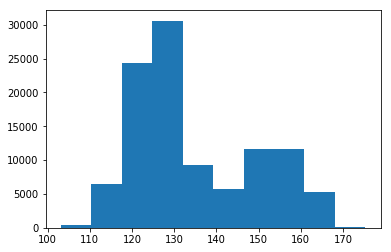

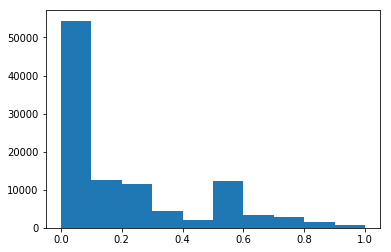

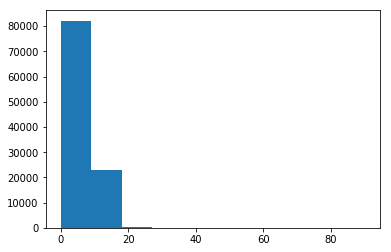

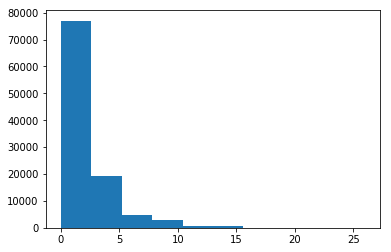

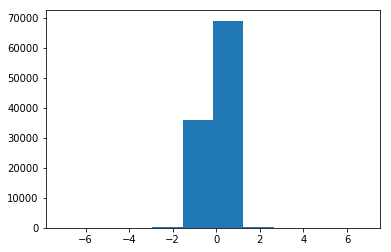

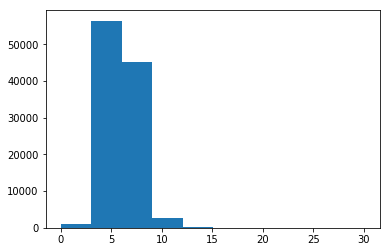

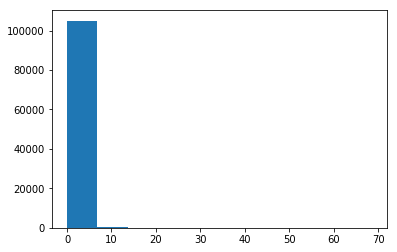

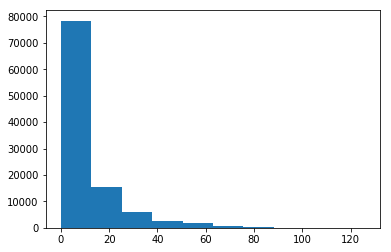

In [23]:
for idx, c in enumerate(feature_cols):
    if idx % 100 == 9:
        try:
            plt.hist(df_train_orig[c])
            plt.show()
        except:
            print ("couldn't make graph")

# Split off an eval set

In [24]:
from sklearn.model_selection import train_test_split

In [30]:
df_train, df_eval = train_test_split(df_train_orig, test_size=0.1, random_state=42)

In [31]:
len(df_train), len(df_eval)

(94923, 10548)

# Try making a preprocessing pipeline

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

In [33]:
scaler = RobustScaler()

In [34]:
y_train = df_train["loss"]

In [35]:
X_train_scaled = scaler.fit_transform(df_train[feature_cols])

In [36]:
pca = PCA(n_components=50)

In [37]:
X_train_reduced = pca.fit_transform(X_train_scaled)

In [38]:
X_train_reduced.shape

(94923, 50)

# Now try experimenting with a linear regression (second baseline)

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [43]:
model = LinearRegression()

In [44]:
model.fit(X_train_reduced, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
y_eval = df_eval["loss"]

In [56]:
ml_pipeline = make_pipeline(scaler, pca, model)

In [58]:
ml_pipeline.fit(df_train[feature_cols], df_train["loss"])

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [59]:
y_eval_pred = ml_pipeline.predict(df_eval[feature_cols])

In [60]:
mean_absolute_error(y_eval, y_eval_pred)

1.4450414406613534

# Try vanilla Random Forest

In [69]:
ml_pipeline = make_pipeline(scaler, pca, RandomForestRegressor())

In [70]:
ml_pipeline.fit(df_train[feature_cols], df_train["loss"])

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('randomforestregressor', RandomForestRegresso...timators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [71]:
y_eval_pred = ml_pipeline.predict(df_eval[feature_cols])

In [72]:
mean_absolute_error(y_eval, y_eval_pred)

1.7273227152066741

# What about without PCA?

In [73]:
ml_pipeline = make_pipeline(scaler, RandomForestRegressor())

In [74]:
#ml_pipeline.fit(df_train[feature_cols], df_train["loss"])

KeyboardInterrupt: 

In [ ]:
#y_eval_pred = ml_pipeline.predict(df_eval[feature_cols])

can't run the above, kills laptop

In [ ]:
#mean_absolute_error(y_eval, y_eval_pred)

# What about splitting into LR and Random Forest - a two stage process?

First make a classifier to identify if default or not

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
ml_pipeline = make_pipeline(scaler, pca, RandomForestClassifier())

In [81]:
ml_pipeline_is_default = make_pipeline(scaler, pca, RandomForestClassifier())

In [82]:
def binariser(x):
    return int(x > 0)

In [85]:
ml_pipeline_is_default.fit(df_train[feature_cols], df_train["loss"].apply(binariser))

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('randomforestclassifier', RandomForestClassif...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [88]:
y_eval_is_default = pd.Series(y_eval_pred).apply(binariser)

In [89]:
y_eval_pred_is_default = ml_pipeline_is_default.predict(df_eval[feature_cols])

In [93]:
y_eval_pred_is_default_proba = ml_pipeline_is_default.predict_proba(df_eval[feature_cols])

In [92]:
confusion_matrix(y_eval_is_default, y_eval_pred_is_default)

array([[3855,    0],
       [6670,   23]])

In [90]:
from sklearn.metrics import confusion_matrix, roc_curve

(array([0.00000000e+00, 0.00000000e+00, 7.78210117e-04, 1.11543450e-02,
       5.49935149e-02, 1.85732815e-01, 4.88197147e-01, 1.00000000e+00]), array([0.00104587, 0.00343643, 0.01628567, 0.05543105, 0.15180039,
       0.36455999, 0.69580158, 1.        ]), array([0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]))


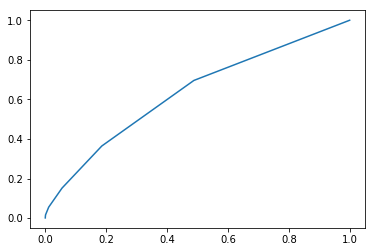

In [96]:
roc = roc_curve(y_eval_is_default, y_eval_pred_is_default_proba[:,1])
print (roc)
plt.plot(roc[0], roc[1])

# Try upsampling cases where default occurred

In [98]:
nonzero_cases = df_train[df_train.loss > 0]

In [99]:
to_concatenate = [df_train]
for i in range(10):
    to_concatenate.append(nonzero_cases)


In [101]:
df_train_upsampled = pd.concat(to_concatenate).sample(frac=1) # shuffle

## Now try the classifier again


The model consists of:

* robust scaler
* PCA to 50 dimensions
* RandomForestClasssifier with 10 estimators to predict if default
* RandomForestRegressor with 10 estimators to predict default value

In [102]:
ml_pipeline_is_default.fit(df_train_upsampled[feature_cols], df_train_upsampled["loss"].apply(binariser))

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('randomforestclassifier', RandomForestClassif...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [103]:
y_eval_is_default = pd.Series(y_eval_pred).apply(binariser)

In [104]:
y_eval_pred_is_default = ml_pipeline_is_default.predict(df_eval[feature_cols])

In [105]:
y_eval_pred_is_default_proba = ml_pipeline_is_default.predict_proba(df_eval[feature_cols])

In [106]:
confusion_matrix(y_eval_is_default, y_eval_pred_is_default)

array([[3843,   12],
       [6651,   42]])

(array([0.        , 0.00103761, 0.00311284, 0.00907912, 0.03916991,
       0.11725032, 0.29961089, 0.60881971, 1.        ]), array([5.97639325e-04, 1.64350814e-03, 6.27521291e-03, 2.28597042e-02,
       8.21754071e-02, 2.05139698e-01, 4.33886150e-01, 7.43762140e-01,
       1.00000000e+00]), array([0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]))


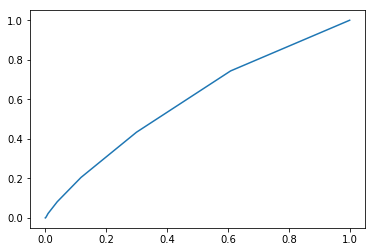

In [107]:
roc = roc_curve(y_eval_is_default, y_eval_pred_is_default_proba[:,1])
print (roc)
plt.plot(roc[0], roc[1])

Train a regressor (second half of pipeline) on the nonzero instances only!

In [108]:
df_train_defaulted = df_train[df_train.loss > 0]

In [109]:
ml_pipeline_default_only = make_pipeline(scaler, pca, RandomForestRegressor())

In [110]:
ml_pipeline_default_only.fit(df_train_defaulted[feature_cols], df_train_defaulted["loss"])

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('randomforestregressor', RandomForestRegresso...timators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [114]:
y_eval_pred_second_half = ml_pipeline_default_only.predict(df_eval[feature_cols]) * y_eval_pred_is_default

In [116]:
mean_absolute_error(y_eval, y_eval_pred_second_half)

0.8213215775502464

^^^ much better performance!

## Try increasing number of estimators

So now the model consists of:

* robust scaler
* PCA to 50 dimensions
* RandomForestClasssifier with 100 estimators to predict if default
* RandomForestRegressor with 100 estimators to predict default value

In [136]:
ml_pipeline_is_default = make_pipeline(scaler, pca, RandomForestClassifier(n_estimators=100))

In [137]:
ml_pipeline_is_default.fit(df_train_upsampled[feature_cols], df_train_upsampled["loss"].apply(binariser))

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('randomforestclassifier', RandomForestClassif...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [138]:
y_eval_is_default = pd.Series(y_eval_pred).apply(binariser)

In [139]:
y_eval_pred_is_default_proba = ml_pipeline_is_default.predict_proba(df_eval[feature_cols])

In [140]:
confusion_matrix(y_eval_is_default, y_eval_pred_is_default)

array([[3843,   12],
       [6651,   42]])

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.59403372e-04, 2.59403372e-04,
       7.78210117e-04, 1.03761349e-03, 1.55642023e-03, 2.07522698e-03,
       3.37224384e-03, 5.18806744e-03, 7.26329442e-03, 8.04150454e-03,
       1.08949416e-02, 1.40077821e-02, 1.89364462e-02, 2.41245136e-02,
       2.64591440e-02, 3.34630350e-02, 4.28015564e-02, 5.42153048e-02,
       6.61478599e-02, 8.14526589e-02, 9.93514916e-02, 1.19584955e-01,
       1.41374838e-01, 1.63164721e-01, 1.94811933e-01, 2.23605707e-01,
       2.56031128e-01, 3.00389105e-01, 3.53047990e-01, 4.07263294e-01,
       4.64072633e-01, 5.19844358e-01, 5.80544747e-01, 6.40726329e-01,
       6.95460441e-01, 7.52010376e-01, 8.02594034e-01, 8.50843061e-01,
       9.01167315e-01, 9.39299611e-01, 9.74837873e-01, 1.00000000e+00]), array([1.49409831e-04, 4.48229494e-04, 7.47049156e-04, 1.64350814e-03,
       2.24114747e-03, 4.93052443e-03, 5.52816375e-03, 7.02226206e-03,
   

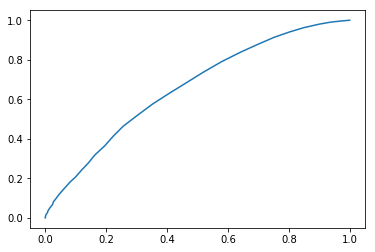

In [141]:
roc = roc_curve(y_eval_is_default, y_eval_pred_is_default_proba[:,1])
print (roc)
plt.plot(roc[0], roc[1])

Train a regressor (second half of pipeline) on the nonzero instances only!

In [142]:
df_train_defaulted = df_train[df_train.loss > 0]

In [143]:
ml_pipeline_default_only = make_pipeline(scaler, pca, RandomForestRegressor(n_estimators=100))

In [144]:
ml_pipeline_default_only.fit(df_train_defaulted[feature_cols], df_train_defaulted["loss"])

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('randomforestregressor', RandomForestRegresso...imators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [145]:
y_eval_pred_second_half = ml_pipeline_default_only.predict(df_eval[feature_cols]) * y_eval_pred_is_default

In [146]:
mean_absolute_error(y_eval, y_eval_pred_second_half)

0.8164761092150171

^^ marginal improvement on the smaller Random Forest model

# Try making test set prediction

In [157]:
y_test_pred_is_default = ml_pipeline_is_default.predict(df_test[feature_cols])

In [158]:
y_test_pred_second_half = ml_pipeline_default_only.predict(df_test[feature_cols]) * y_test_pred_is_default

In [159]:
df_test_submission = pd.DataFrame()
df_test_submission["id"] = df_test["id"]
df_test_submission["loss"] = y_test_pred_second_half


In [160]:
df_test_submission.head()

,id,loss
0,105472,0.0
1,105473,0.0
2,105474,0.0
3,105475,0.0
4,105476,0.0


In [161]:
df_test_submission.to_csv("submission1.csv",index=False)

# What about PCAing to 100 dimensions instead of 50?

So now the model consists of:

* robust scaler
* PCA to 100 dimensions
* RandomForestClasssifier with 100 estimators to predict if default
* RandomForestRegressor with 100 estimators to predict default value

In [162]:
pca = PCA(n_components=100)

In [164]:
ml_pipeline_is_default = make_pipeline(scaler, pca, RandomForestClassifier(n_estimators=100))

In [165]:
ml_pipeline_is_default.fit(df_train_upsampled[feature_cols], df_train_upsampled["loss"].apply(binariser))

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('randomforestclassifier', RandomForestClassi...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [166]:
y_eval_is_default = pd.Series(y_eval_pred).apply(binariser)

In [167]:
y_eval_pred_is_default_proba = ml_pipeline_is_default.predict_proba(df_eval[feature_cols])

In [168]:
confusion_matrix(y_eval_is_default, y_eval_pred_is_default)

array([[3843,   12],
       [6651,   42]])

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.59403372e-04, 5.18806744e-04, 5.18806744e-04,
       7.78210117e-04, 7.78210117e-04, 1.55642023e-03, 3.11284047e-03,
       4.40985733e-03, 5.96627756e-03, 8.04150454e-03, 1.03761349e-02,
       1.34889754e-02, 1.66018158e-02, 2.02334630e-02, 2.56809339e-02,
       3.29442283e-02, 3.83916991e-02, 4.79896239e-02, 5.68093385e-02,
       6.40726329e-02, 7.49675746e-02, 9.07911803e-02, 1.10765240e-01,
       1.34889754e-01, 1.60051881e-01, 1.87289235e-01, 2.24643320e-01,
       2.66147860e-01, 3.06874189e-01, 3.59792477e-01, 4.14007782e-01,
       4.71335927e-01, 5.32814527e-01, 5.92477302e-01, 6.59662776e-01,
       7.15953307e-01, 7.69909209e-01, 8.24124514e-01, 8.70298314e-01,
       9.17769131e-01, 9.55382620e-01, 9.81841764e-01, 1.00000000e+00]), array([1.49409831e-04, 5.97639325e-04, 1.04586882e-03, 1.49409831e-03,
       2.24114747e-03, 2.53996713e-03, 4.18347527e-03, 5.07993426e-03,
   

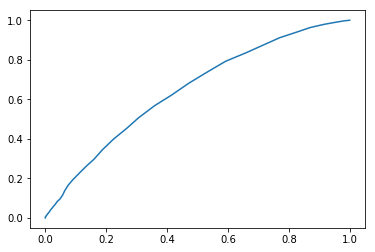

In [169]:
roc = roc_curve(y_eval_is_default, y_eval_pred_is_default_proba[:,1])
print (roc)
plt.plot(roc[0], roc[1])

Train a regressor (second half of pipeline) on the nonzero instances only!

In [170]:
df_train_defaulted = df_train[df_train.loss > 0]

In [171]:
ml_pipeline_default_only = make_pipeline(scaler, pca, RandomForestRegressor(n_estimators=100))

In [172]:
ml_pipeline_default_only.fit(df_train_defaulted[feature_cols], df_train_defaulted["loss"])

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('randomforestregressor', RandomForestRegress...imators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [173]:
y_eval_pred_second_half = ml_pipeline_default_only.predict(df_eval[feature_cols]) * y_eval_pred_is_default

In [174]:
mean_absolute_error(y_eval, y_eval_pred_second_half)

0.8193164580963216

No noticeable change from PCA to more dimensions. Keep it at 50 in the future.

In [177]:
pca = PCA(n_components=50)

# Try Keras for regression part

In [178]:
ml_pipeline_is_default = make_pipeline(scaler, pca, RandomForestClassifier(n_estimators=100))

In [179]:
ml_pipeline_is_default.fit(df_train_upsampled[feature_cols], df_train_upsampled["loss"].apply(binariser))

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('randomforestclassifier', RandomForestClassif...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [180]:
y_eval_is_default = pd.Series(y_eval_pred).apply(binariser)

In [181]:
y_eval_pred_is_default_proba = ml_pipeline_is_default.predict_proba(df_eval[feature_cols])

In [182]:
confusion_matrix(y_eval_is_default, y_eval_pred_is_default)

array([[3843,   12],
       [6651,   42]])

Train a regressor (second half of pipeline) on the nonzero instances only!

In [183]:
df_train_defaulted = df_train[df_train.loss > 0]

In [184]:
preprocessing_pipeline_only = make_pipeline(scaler, pca)

In [186]:
X_train_for_keras = preprocessing_pipeline_only.fit_transform(df_train_defaulted[feature_cols])

In [193]:
y_train_for_keras = df_train_defaulted.loss

In [187]:
np.shape(X_train_for_keras)

(8793, 50)

In [175]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [191]:
input_dim = X_train_for_keras.shape[1]
print (input_dim)
model = Sequential()
model.add(Dense(128, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(1))

50


In [192]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [196]:
model.fit(X_train_for_keras, y_train_for_keras, nb_epoch=100, batch_size=16, validation_split=0.1)


Train on 7913 samples, validate on 880 samples
Epoch 1/100
2880/7913 [=========>....................] - ETA: 0s - loss: 22351277711.3567

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


7913/7913 [==============================] - 1s 73us/step - loss: 164979725180.6201 - val_loss: 107160452665.0467
Epoch 2/100
7913/7913 [==============================] - 0s 61us/step - loss: 92408173597.5376 - val_loss: 103780782340.3098
Epoch 3/100
7913/7913 [==============================] - 1s 65us/step - loss: 44075108790.0888 - val_loss: 7612147489.3357
Epoch 4/100
7913/7913 [==============================] - 0s 63us/step - loss: 51268114689.7803 - val_loss: 12413162424.3809
Epoch 5/100
7913/7913 [==============================] - 1s 64us/step - loss: 54455522088.6054 - val_loss: 1304011571.4660
Epoch 6/100
7913/7913 [==============================] - 0s 61us/step - loss: 13779106980.5590 - val_loss: 55276364.2599
Epoch 7/100
7913/7913 [==============================] - 1s 67us/step - loss: 11646804913.1753 - val_loss: 6316252930.6957
Epoch 8/100
7913/7913 [==============================] - 1s 64us/step - loss: 10100001829.6342 - val_loss: 1708496887.7982
Epoch 9/100
7913/7913 [=

7913/7913 [==============================] - 1s 72us/step - loss: 658193.8174 - val_loss: 7684953475.5649
Epoch 72/100
7913/7913 [==============================] - 1s 72us/step - loss: 344968328.0729 - val_loss: 10151767.4031
Epoch 73/100
7913/7913 [==============================] - 1s 68us/step - loss: 22553492.6618 - val_loss: 27768629.5863
Epoch 74/100
7913/7913 [==============================] - 1s 69us/step - loss: 185116979.1152 - val_loss: 28277530.2369
Epoch 75/100
7913/7913 [==============================] - 1s 68us/step - loss: 13618910745.0157 - val_loss: 1602614352.9680
Epoch 76/100
7913/7913 [==============================] - 1s 76us/step - loss: 1307414692.1469 - val_loss: 21653285.0909
Epoch 77/100
7913/7913 [==============================] - 1s 72us/step - loss: 626696667.6490 - val_loss: 13747858.8252
Epoch 78/100
7913/7913 [==============================] - 1s 68us/step - loss: 138012944.1040 - val_loss: 36889051.2913
Epoch 79/100
7913/7913 [==========================

Keras would need some more work to choose a stable NN architecture